In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_recall_curve, classification_report, confusion_matrix, fbeta_score, accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

C:\Users\shaur\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load dataset
dataset = pd.read_csv(r"C:\Users\shaur\Downloads\train_dataset_final1.csv")

In [3]:
dataset.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [4]:
dataset.drop('Customer_ID', axis=1, inplace=True)

In [5]:
dataset.head()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,2,0,2,60000,25.0,2,2,2,0,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,1,0,2,180000,63.0,0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,1,1,2,210000,43.0,0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   marriage            25247 non-null  int64  
 1   sex                 25247 non-null  int64  
 2   education           25247 non-null  int64  
 3   LIMIT_BAL           25247 non-null  int64  
 4   age                 25121 non-null  float64
 5   pay_0               25247 non-null  int64  
 6   pay_2               25247 non-null  int64  
 7   pay_3               25247 non-null  int64  
 8   pay_4               25247 non-null  int64  
 9   pay_5               25247 non-null  int64  
 10  pay_6               25247 non-null  int64  
 11  Bill_amt1           25247 non-null  float64
 12  Bill_amt2           25247 non-null  float64
 13  Bill_amt3           25247 non-null  float64
 14  Bill_amt4           25247 non-null  float64
 15  Bill_amt5           25247 non-null  float64
 16  Bill

In [7]:
dataset.head()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,2,0,2,60000,25.0,2,2,2,0,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,1,0,2,180000,63.0,0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,1,1,2,210000,43.0,0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [8]:
dataset.isnull().sum()

marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64

In [9]:
dataset['age'].fillna(dataset['age'].median(), inplace=True)

C:\Users\shaur\AppData\Local\Temp\ipykernel_23284\1680324050.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['age'].fillna(dataset['age'].median(), inplace=True)


In [10]:
dataset.duplicated().sum()

np.int64(803)

In [11]:
# Drop the duplicated rows
dataset = dataset.drop_duplicates()

In [12]:
dataset.duplicated().sum()

np.int64(0)

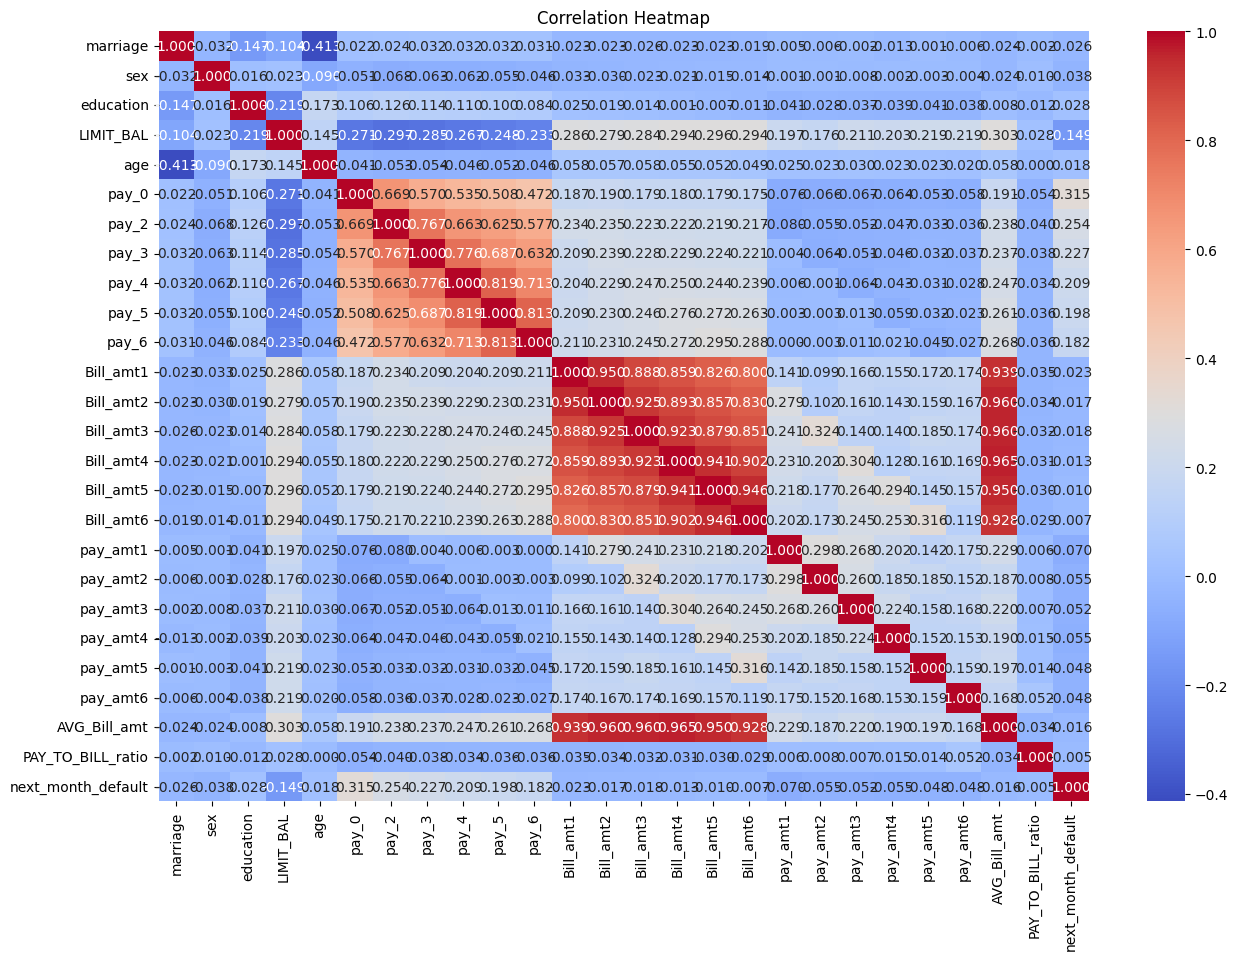

In [ ]:
corr_matrix = dataset.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

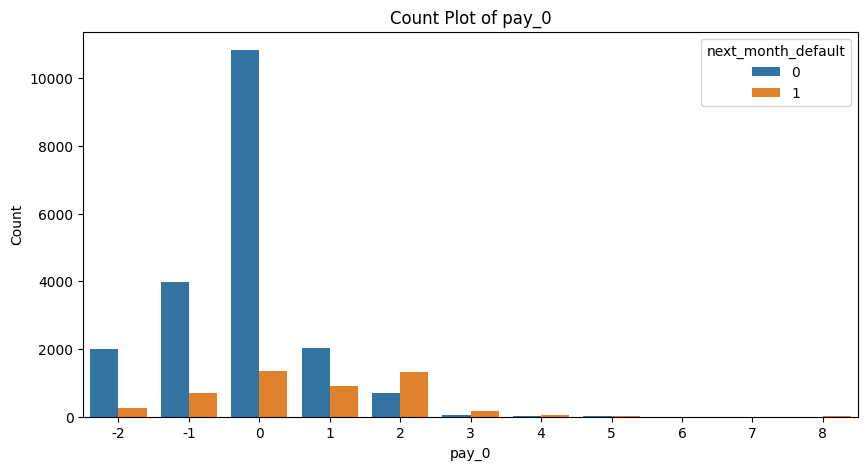

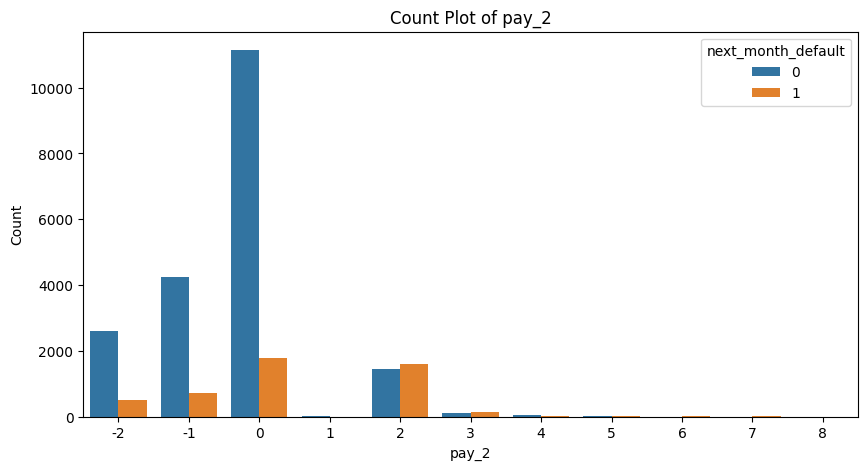

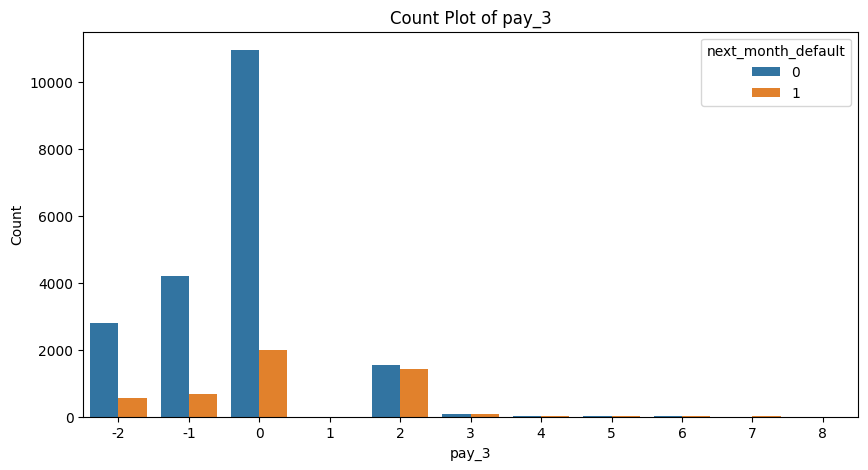

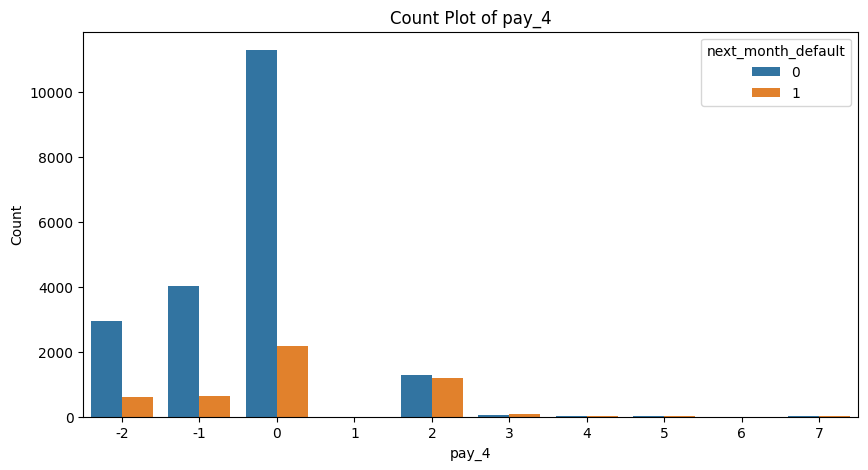

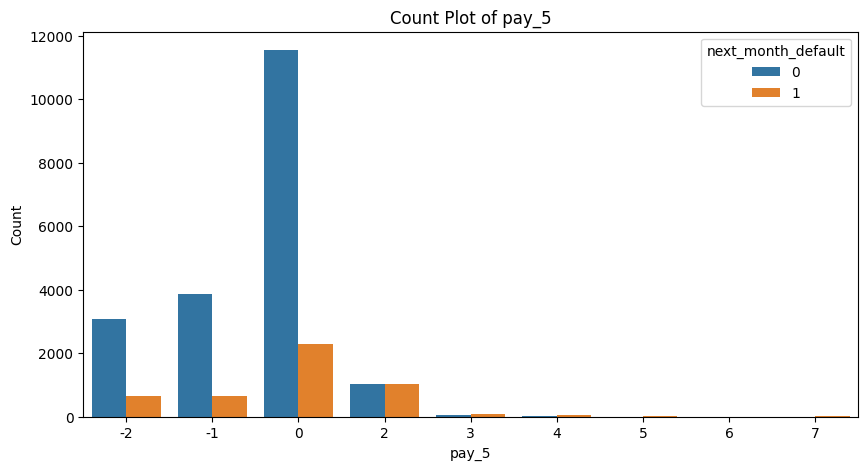

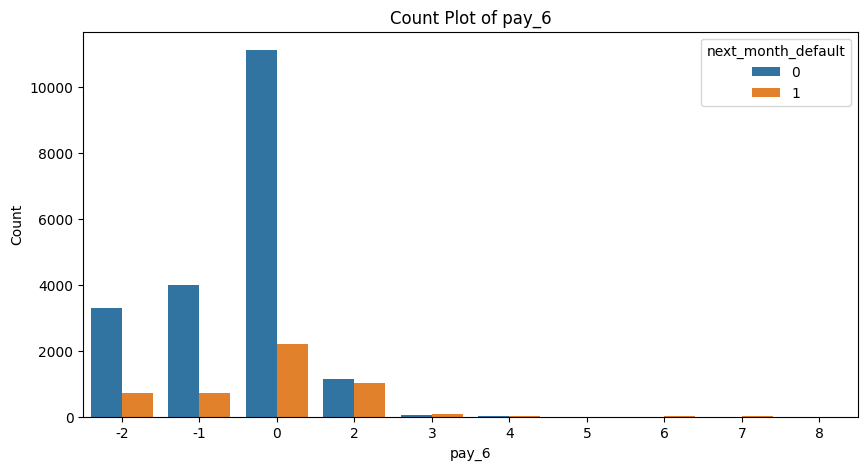

In [14]:
pay_hist_cols=["pay_0","pay_2","pay_3","pay_4","pay_5","pay_6"]
for pay_hist_col in pay_hist_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=pay_hist_col, data=dataset, hue='next_month_default')
    plt.title('Count Plot of '+pay_hist_col)
    plt.xlabel(pay_hist_col)
    plt.ylabel('Count')
    plt.show()

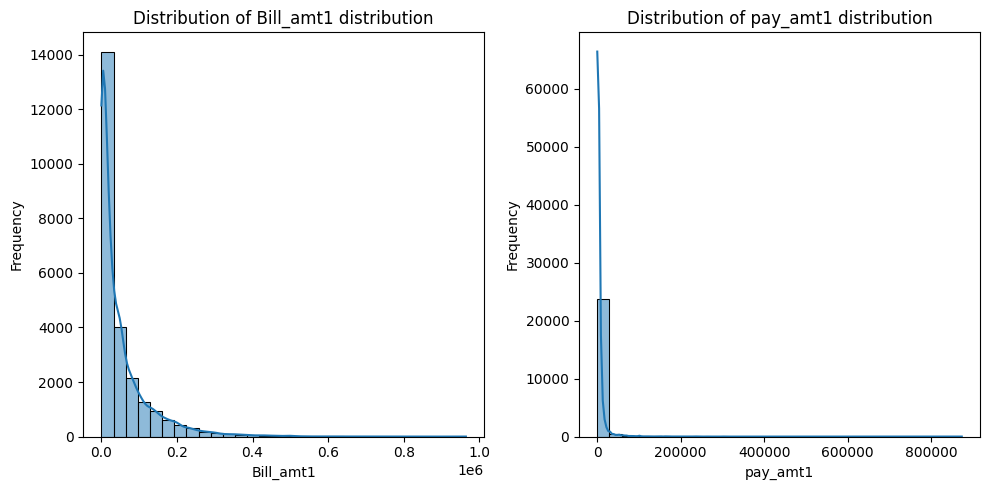

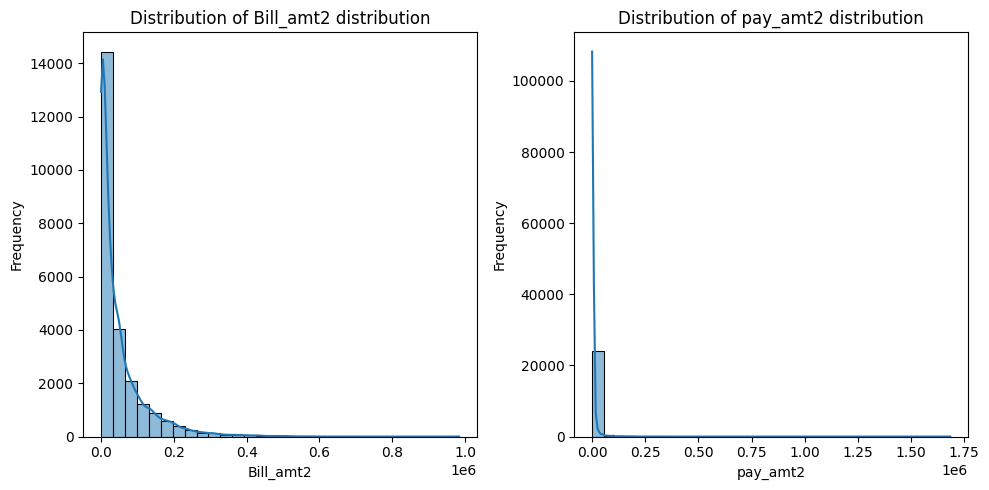

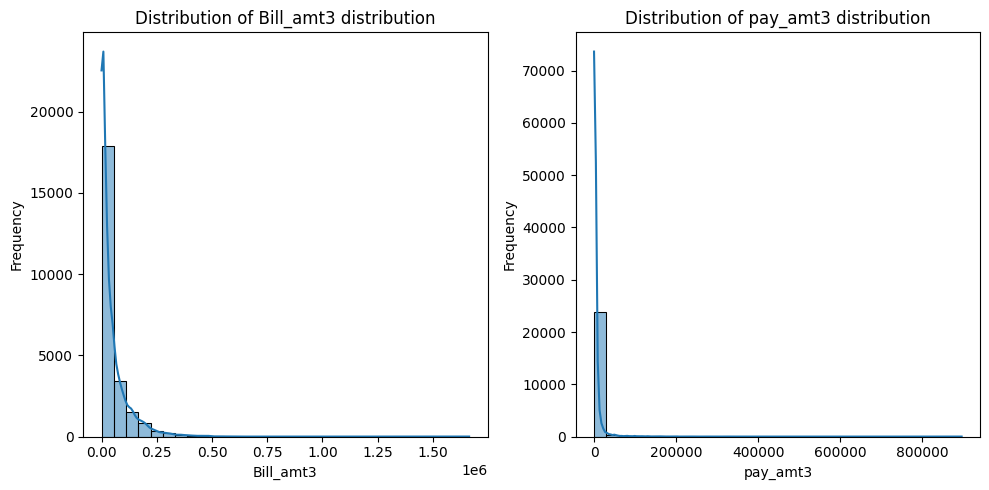

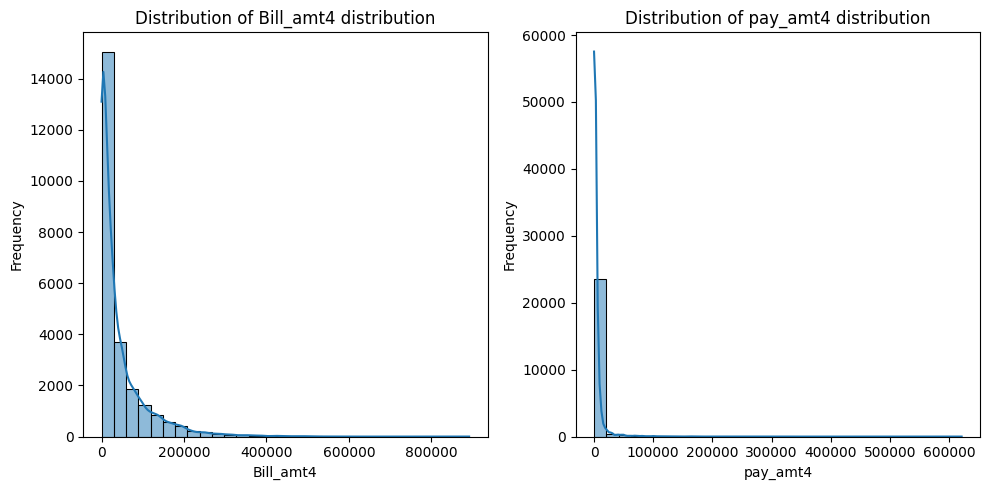

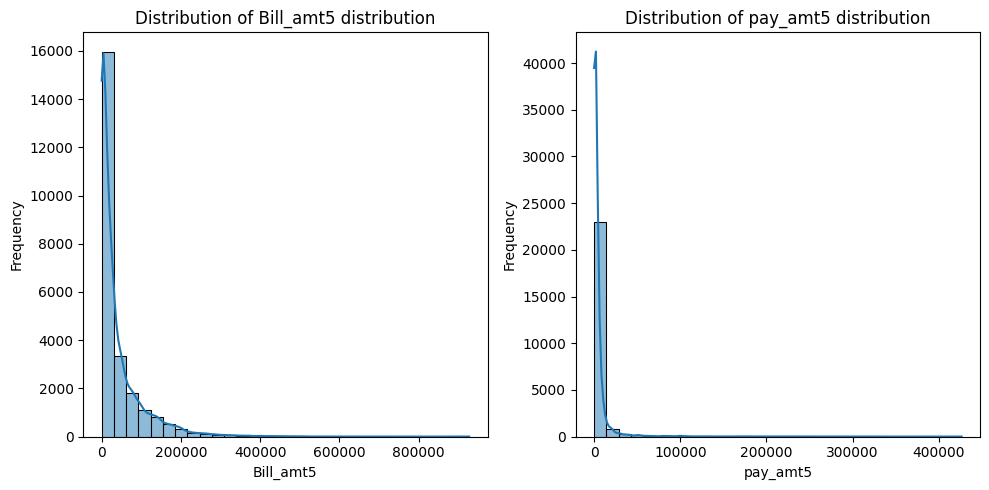

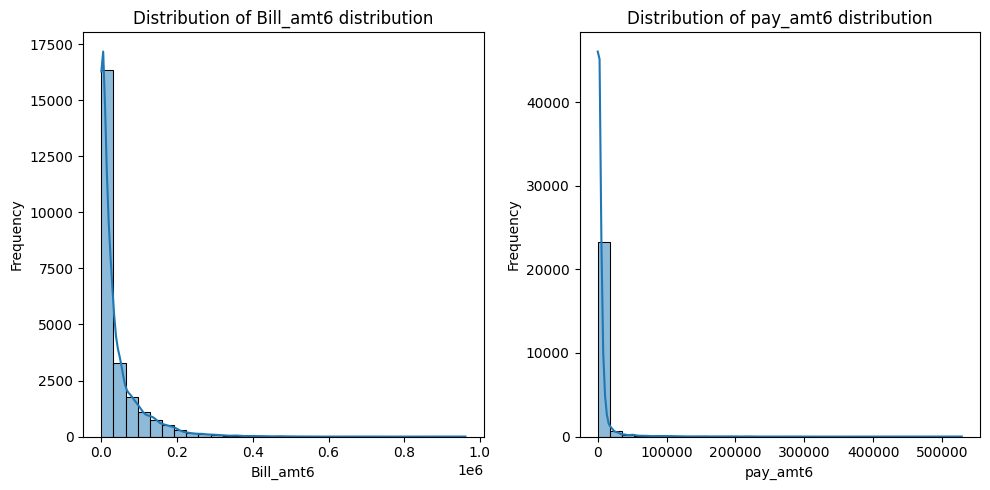

In [15]:
for i in range(1, 7):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(dataset['Bill_amt' + str(i)], bins=30, kde=True)
    plt.title('Distribution of Bill_amt' + str(i)+" distribution")
    plt.xlabel('Bill_amt' + str(i))
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.histplot(dataset['pay_amt' + str(i)], bins=30, kde=True)
    plt.title('Distribution of pay_amt' + str(i)+" distribution")
    plt.xlabel('pay_amt' + str(i))
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

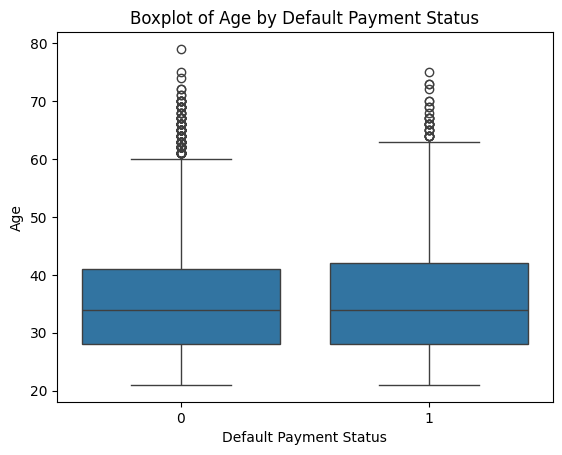

In [16]:
sns.boxplot(x='next_month_default', y='age', data=dataset)
plt.title('Boxplot of Age by Default Payment Status')
plt.xlabel('Default Payment Status')
plt.ylabel('Age')
plt.show()

C:\Users\shaur\AppData\Local\Temp\ipykernel_23284\4141317036.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['LIMIT_BAL'], bins=200, kde=True,color='blue')


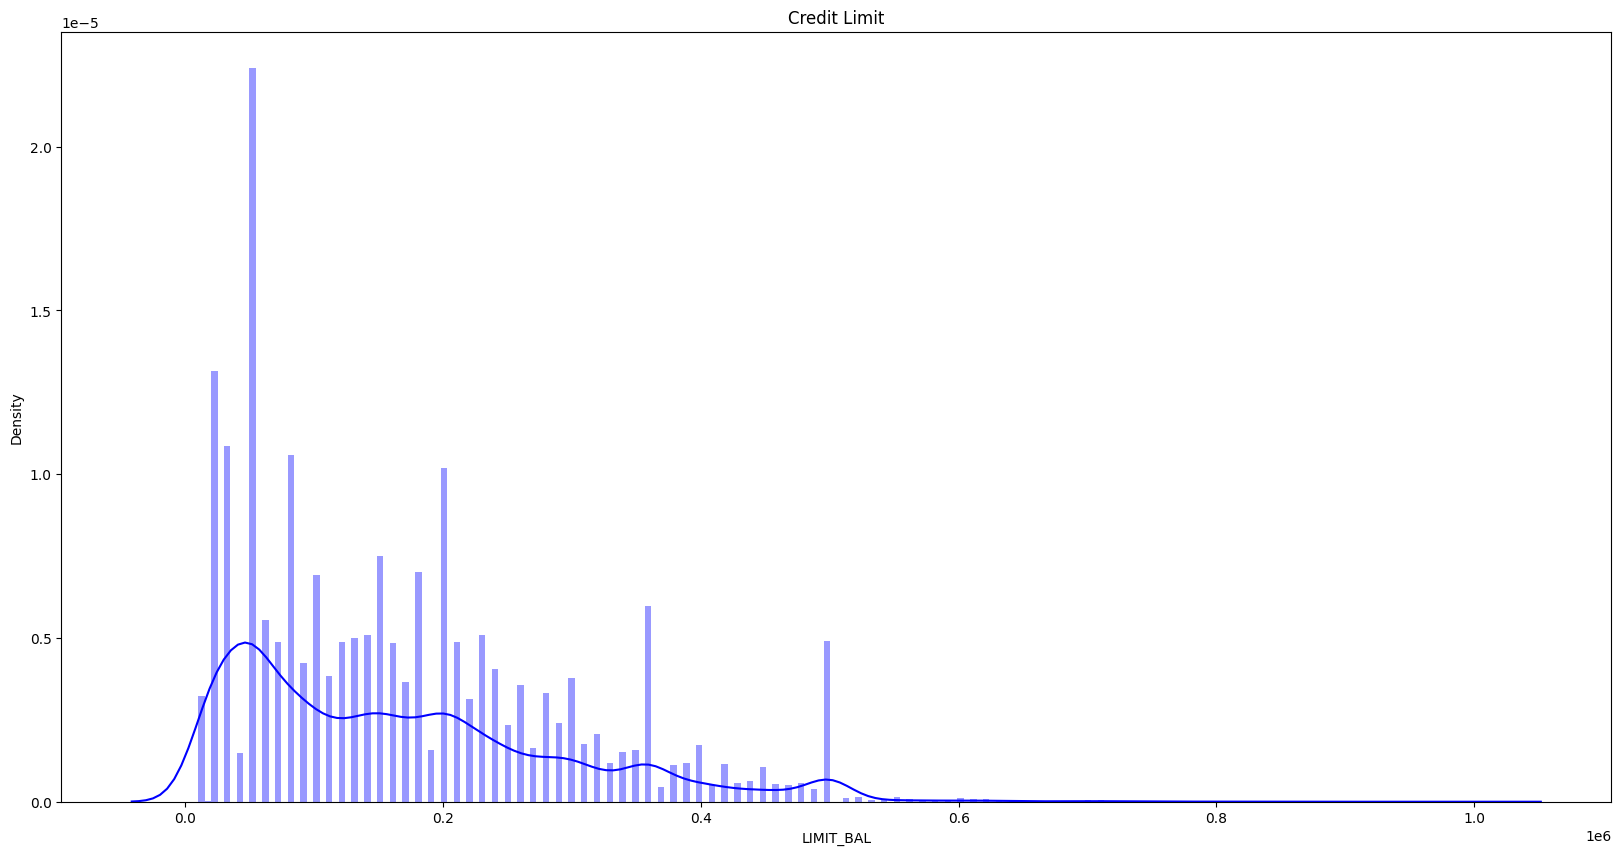

In [17]:
plt.figure(figsize=(20, 10))
plt.title('Credit Limit')
sns.distplot(dataset['LIMIT_BAL'], bins=200, kde=True,color='blue')
plt.show()

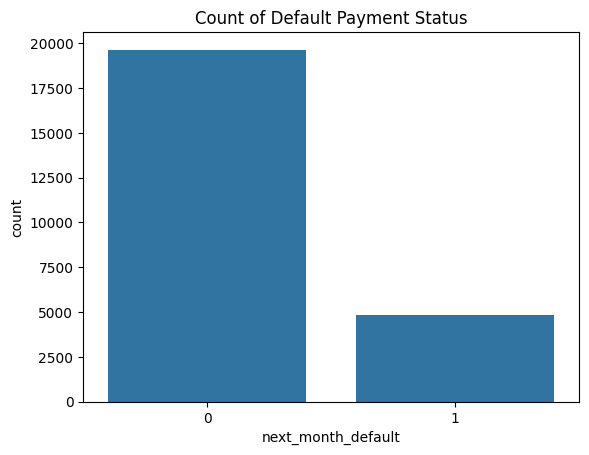

In [18]:
sns.countplot(x='next_month_default', data=dataset)
plt.title('Count of Default Payment Status')
plt.show()

In [19]:
dataset['next_month_default'].value_counts()

next_month_default
0    19637
1     4807
Name: count, dtype: int64

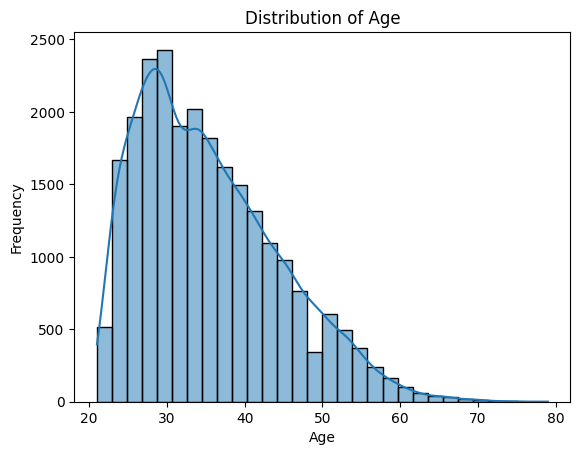

In [20]:
sns.histplot(dataset['age'],bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

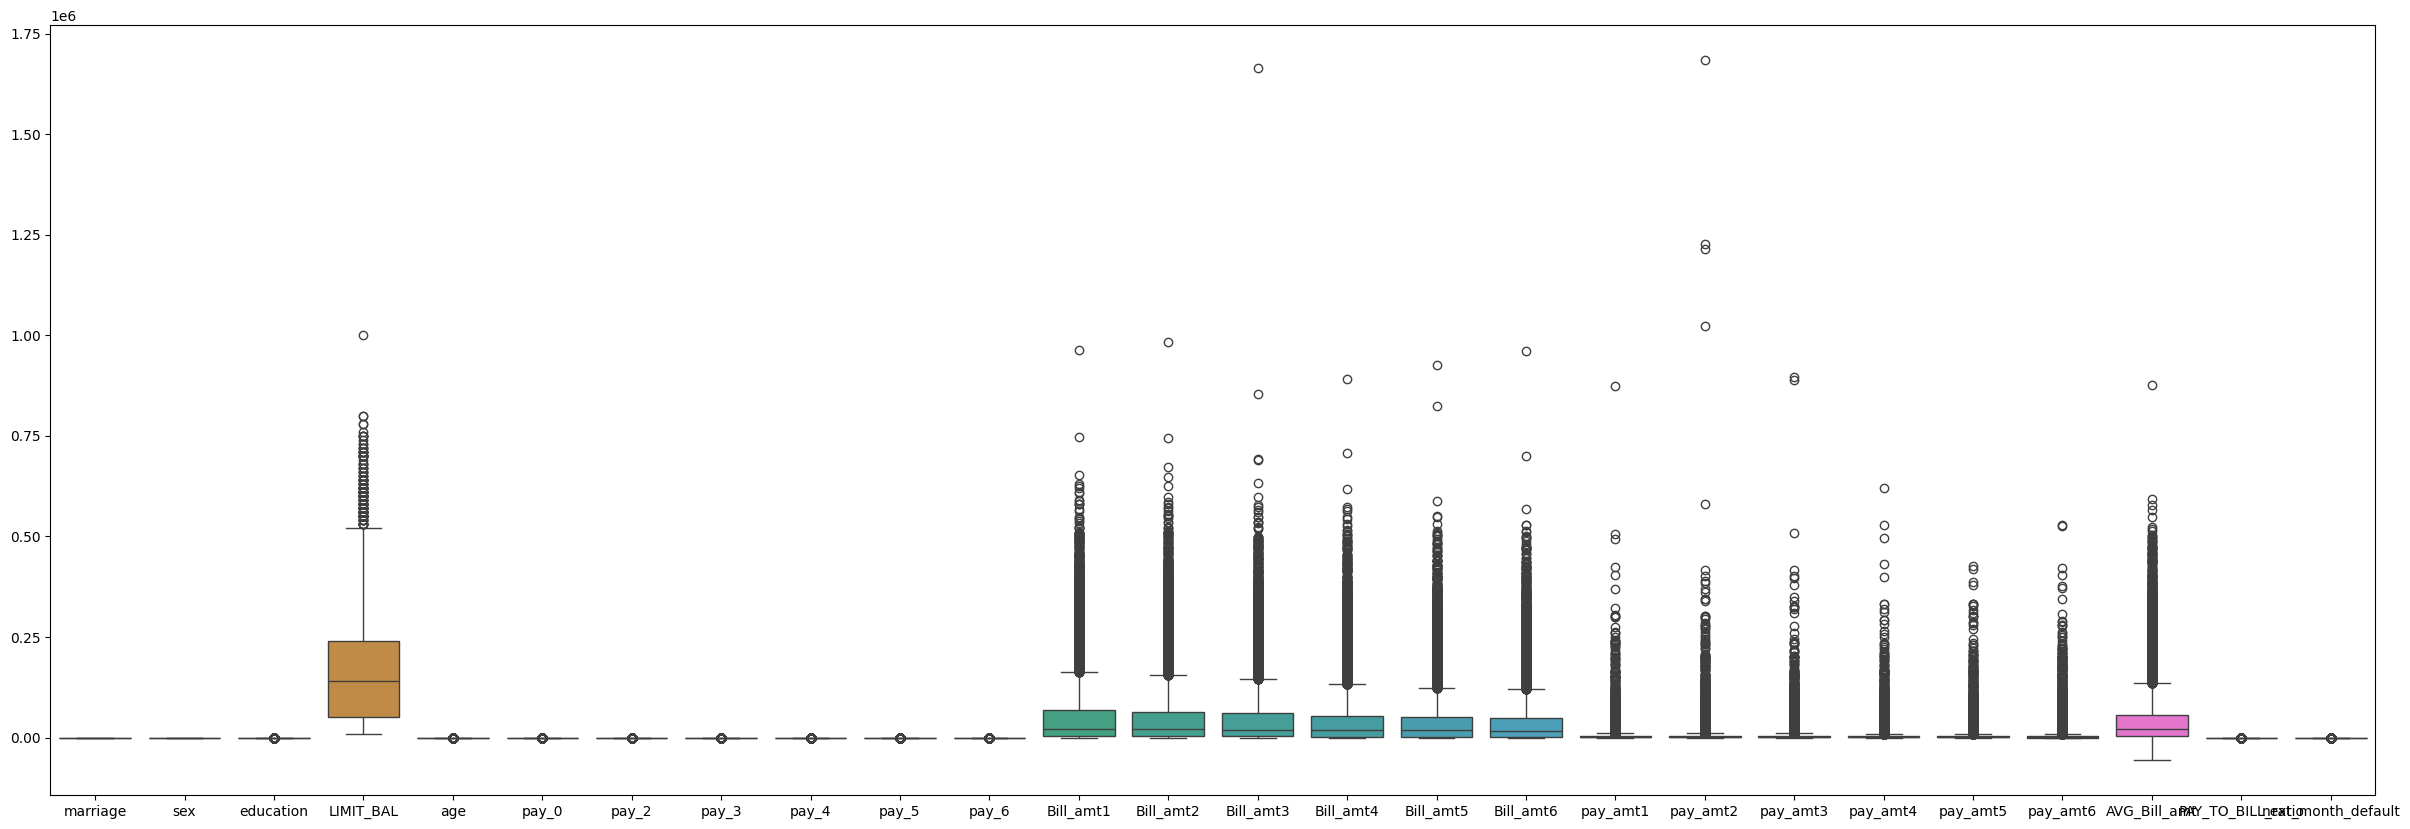

In [21]:
plt.figure(figsize=(30, 10))
sns.boxplot(data=dataset)
plt.show()

In [22]:
dataset.head()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,2,0,2,60000,25.0,2,2,2,0,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,1,0,2,180000,63.0,0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,1,1,2,210000,43.0,0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [23]:
dataset.isnull().sum()

marriage              0
sex                   0
education             0
LIMIT_BAL             0
age                   0
pay_0                 0
pay_2                 0
pay_3                 0
pay_4                 0
pay_5                 0
pay_6                 0
Bill_amt1             0
Bill_amt2             0
Bill_amt3             0
Bill_amt4             0
Bill_amt5             0
Bill_amt6             0
pay_amt1              0
pay_amt2              0
pay_amt3              0
pay_amt4              0
pay_amt5              0
pay_amt6              0
AVG_Bill_amt          0
PAY_TO_BILL_ratio     0
next_month_default    0
dtype: int64

In [24]:
dataset['sum_bill_amt'] = dataset[['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']].sum(axis=1)
bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]
# Calculate the average utilization ratio as per the formula: Avg Utilization Ratio = (sum of Bill_amt1 to Bill_amt6) / (6 * LIMIT_BAL)
dataset['Avg_Utilization_Ratio'] = dataset['sum_bill_amt'] / (6 * dataset['LIMIT_BAL'])

dataset['peak_utilization'] = dataset[bill_cols].max(axis=1)/dataset['LIMIT_BAL']
dataset.drop('sum_bill_amt', axis=1, inplace=True)

In [25]:
pay_cols = [f'pay_{i}' for i in (0,2,3,4,5,6)]
dataset['max_delinquency'] = dataset[pay_cols].max(axis=1)
dataset['delinquency_count'] = (dataset[pay_cols] >= 1).sum(axis=1)

In [26]:
dataset['on_time_rate'] = (dataset[pay_cols] == -1).sum(axis=1) / len(pay_cols)

In [27]:
def max_streak(arr):
        max_s, cur = 0, 0
        for v in arr:
            if v >= 1:
                cur += 1
                max_s = max(max_s, cur)
            else:
                cur = 0
        return max_s
dataset['delinquency_streak'] = dataset[pay_cols].apply(max_streak, axis=1)

In [28]:
pay_amt_cols = [f'pay_amt{i}' for i in range(1, 7)]

In [29]:
final_data = dataset[['AVG_Bill_amt', 'age', 'marriage', 'education', 'LIMIT_BAL', 'PAY_TO_BILL_ratio', 'Avg_Utilization_Ratio', 'delinquency_streak', 'peak_utilization', 'max_delinquency', 'delinquency_count', 'on_time_rate', 'pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6', 'next_month_default']]

In [30]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24444 entries, 0 to 25246
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AVG_Bill_amt           24444 non-null  float64
 1   age                    24444 non-null  float64
 2   marriage               24444 non-null  int64  
 3   education              24444 non-null  int64  
 4   LIMIT_BAL              24444 non-null  int64  
 5   PAY_TO_BILL_ratio      24444 non-null  float64
 6   Avg_Utilization_Ratio  24444 non-null  float64
 7   delinquency_streak     24444 non-null  int64  
 8   peak_utilization       24444 non-null  float64
 9   max_delinquency        24444 non-null  int64  
 10  delinquency_count      24444 non-null  int64  
 11  on_time_rate           24444 non-null  float64
 12  pay_amt1               24444 non-null  float64
 13  pay_amt2               24444 non-null  float64
 14  pay_amt3               24444 non-null  float64
 15  pay_amt

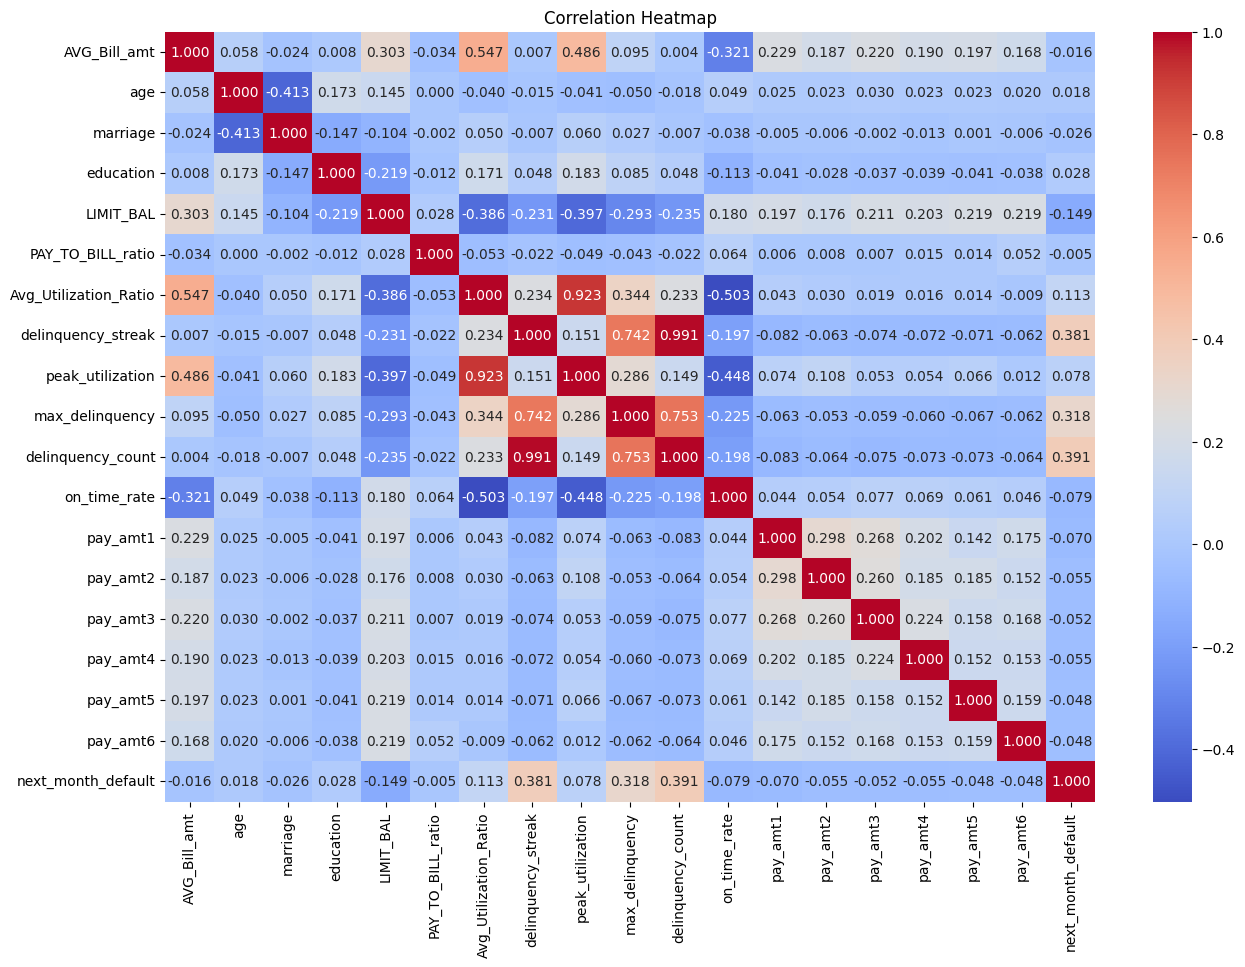

In [ ]:
corr_matrix = final_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [32]:

X = dataset[['AVG_Bill_amt', 'age', 'marriage', 'education', 'LIMIT_BAL', 'PAY_TO_BILL_ratio', 'Avg_Utilization_Ratio', 'delinquency_streak', 'peak_utilization', 'max_delinquency', 'delinquency_count', 'on_time_rate', 'pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6']]
y = dataset['next_month_default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

print(y_train.value_counts())

next_month_default
0    11761
1     2905
Name: count, dtype: int64


In [33]:
smote = SMOTE(sampling_strategy='minority', k_neighbors=7)
X_train, y_train = smote.fit_resample(X_train, y_train)

print(y_train.value_counts())

next_month_default
0    11761
1    11761
Name: count, dtype: int64


In [34]:
threshold = 0.465

Using threshold = 0.465
Accuracy: 0.7321538146860299

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82      7876
           1       0.39      0.67      0.49      1902

    accuracy                           0.73      9778
   macro avg       0.65      0.71      0.66      9778
weighted avg       0.80      0.73      0.75      9778



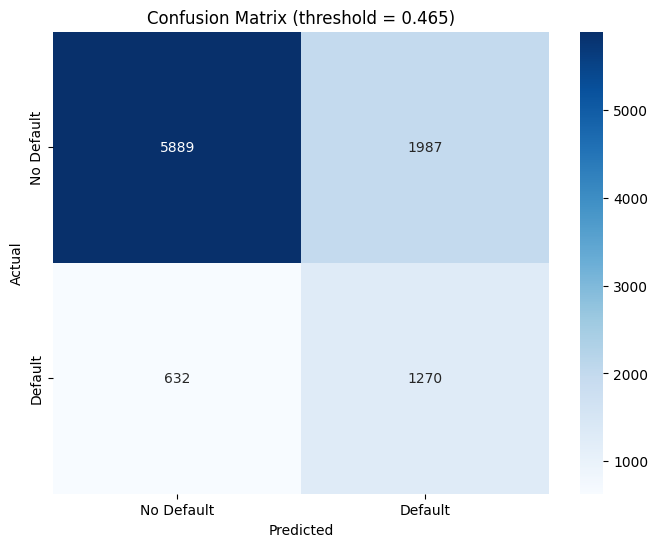

AUC-ROC : 0.764175256699665
F2 Score: 0.5844454670961804


In [35]:
from sklearn.ensemble import RandomForestClassifier as rf

rf_clf = rf(max_depth=5, n_estimators=250)
rf_clf.fit(X_train, y_train)

y_proba = rf_clf.predict_proba(X_test)[:, 1]

y_pred = (y_proba > threshold).astype(int)

print(f"Using threshold = {threshold:.3f}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['No Default', 'Default'],
    yticklabels=['No Default', 'Default']
)
plt.title(f'Confusion Matrix (threshold = {threshold:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("AUC-ROC :", roc_auc_score(y_test, y_proba))
print("F2 Score:", fbeta_score(y_test, y_pred, beta=2))

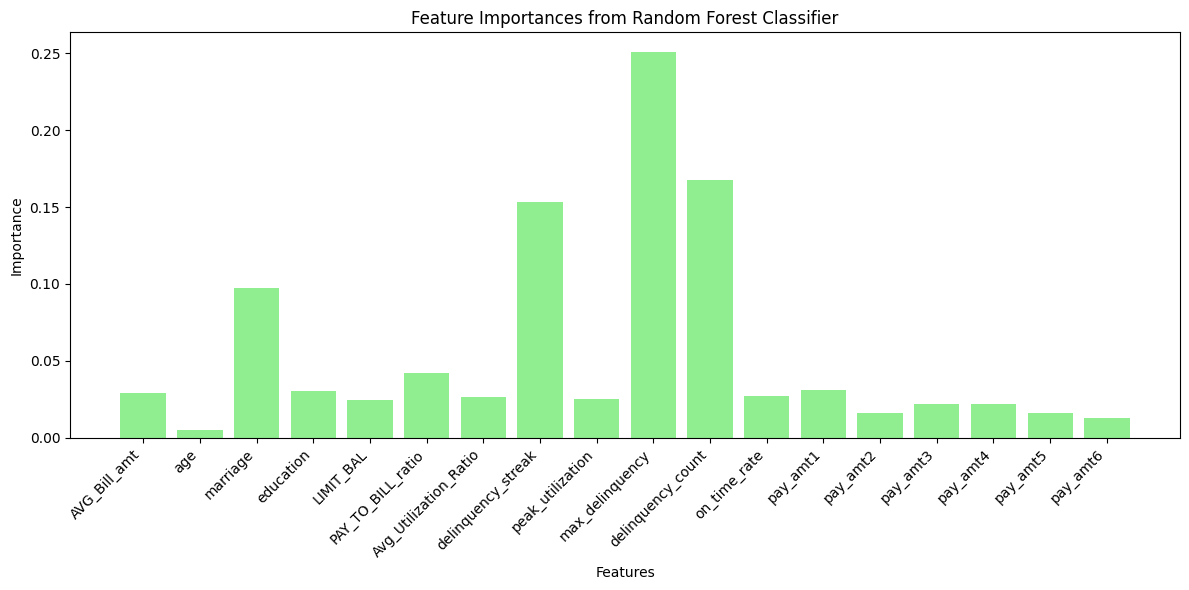

In [36]:
plt.figure(figsize=(12, 6)) 
plt.bar(X_train.columns, rf_clf.feature_importances_, color='lightgreen')
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.tight_layout()
plt.show()

Using threshold = 0.465
Accuracy: 0.7914706483943547

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      7876
           1       0.46      0.40      0.43      1902

    accuracy                           0.79      9778
   macro avg       0.66      0.64      0.65      9778
weighted avg       0.78      0.79      0.79      9778



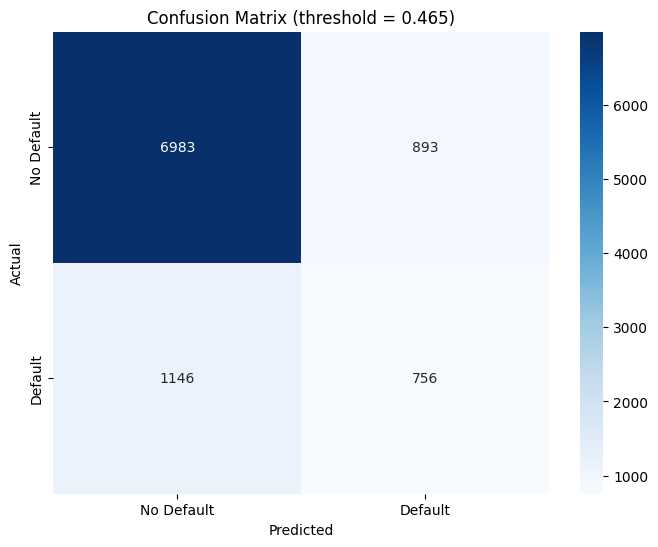

AUC-ROC : 0.7344546971218984
F2 Score: 0.4083396348709085


In [37]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

y_proba = xgb_clf.predict_proba(X_test)[:, 1]

y_pred = (y_proba > threshold).astype(int)

print(f"Using threshold = {threshold:.3f}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['No Default', 'Default'],
    yticklabels=['No Default', 'Default']
)
plt.title(f'Confusion Matrix (threshold = {threshold:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("AUC-ROC :", roc_auc_score(y_test, y_proba))
print("F2 Score:", fbeta_score(y_test, y_pred, beta=2))

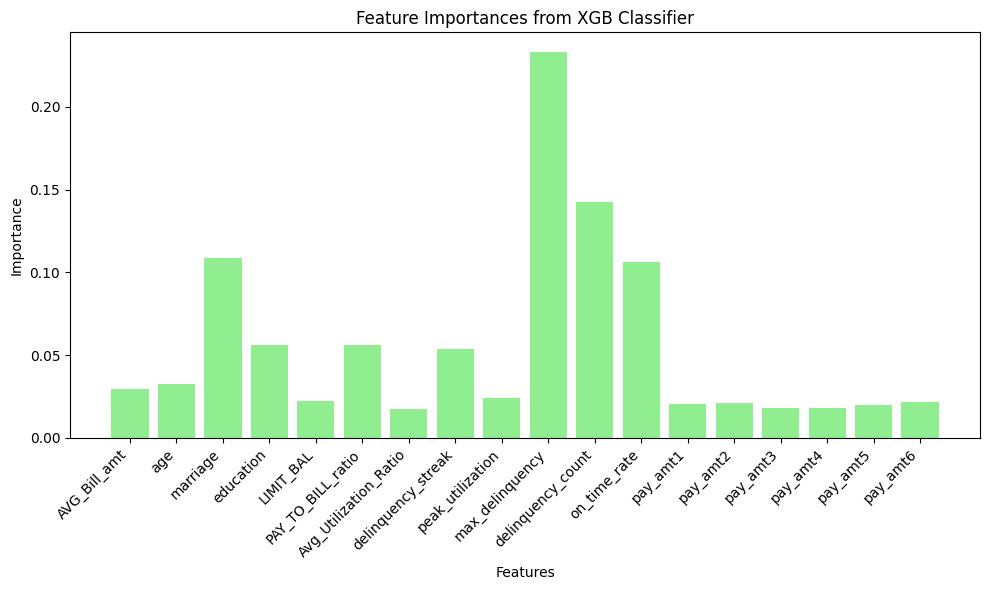

In [57]:
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, xgb_clf.feature_importances_, color='lightgreen')
plt.title('Feature Importances from XGB Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.tight_layout()
plt.show()

Using threshold = 0.465
Accuracy: 0.6655757823685825

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.65      0.76      7876
           1       0.33      0.72      0.46      1902

    accuracy                           0.67      9778
   macro avg       0.62      0.69      0.61      9778
weighted avg       0.79      0.67      0.70      9778



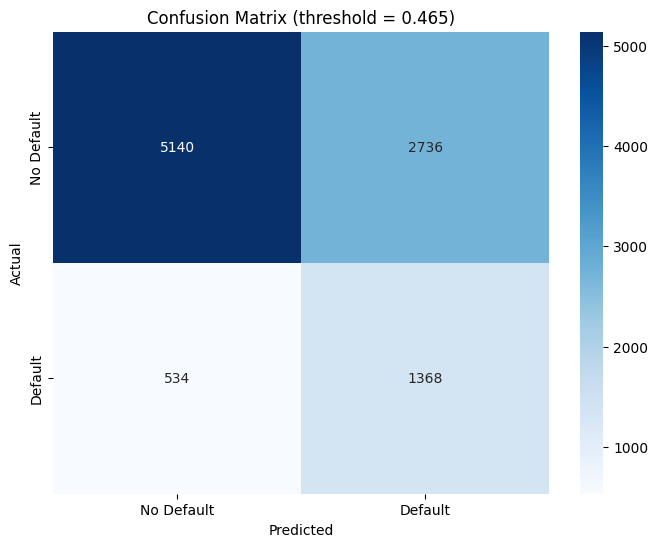

AUC-ROC : 0.7314661092891448
F2 Score: 0.5840163934426229


In [39]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=7, random_state=42)
ada_clf.fit(X_train, y_train)

y_proba = ada_clf.predict_proba(X_test)[:, 1]

y_pred = (y_proba > threshold).astype(int)

print(f"Using threshold = {threshold:.3f}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['No Default', 'Default'],
    yticklabels=['No Default', 'Default']
)
plt.title(f'Confusion Matrix (threshold = {threshold:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("AUC-ROC :", roc_auc_score(y_test, y_proba))
print("F2 Score:", fbeta_score(y_test, y_pred, beta=2))


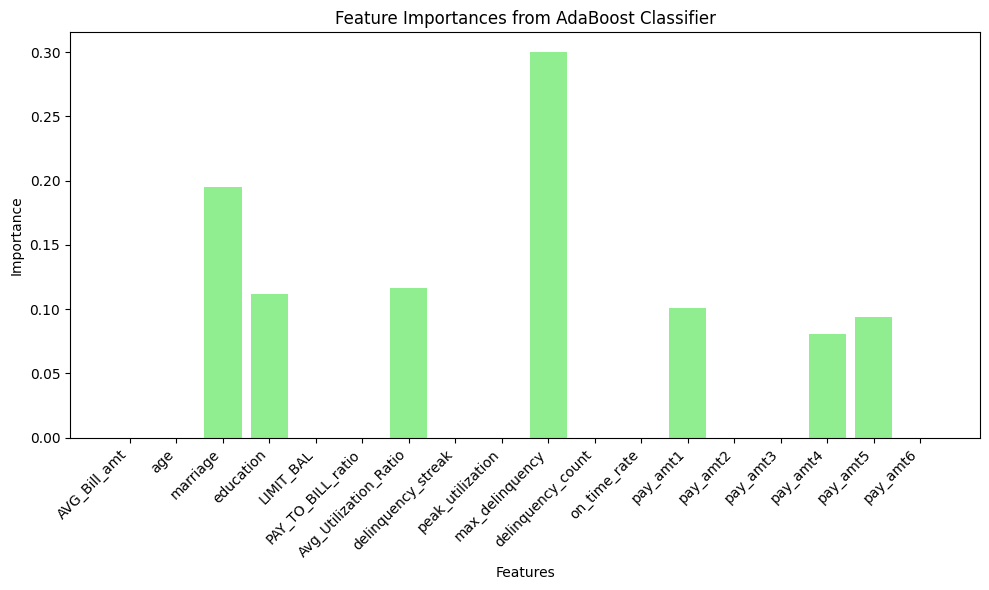

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, ada_clf.feature_importances_, color='lightgreen')
plt.title('Feature Importances from AdaBoost Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.tight_layout()
plt.show()

[LightGBM] [Info] Number of positive: 11761, number of negative: 11761
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3335
[LightGBM] [Info] Number of data points in the train set: 23522, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Using threshold = 0.465
Accuracy: 0.7101656780527715

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      7876
           1       0.37      0.67      0.47      1902

    accuracy                           0.71      9778
   macro avg       0.63      0.69      0.64      9778
weighted avg       0.80      0.71      0.74      9778



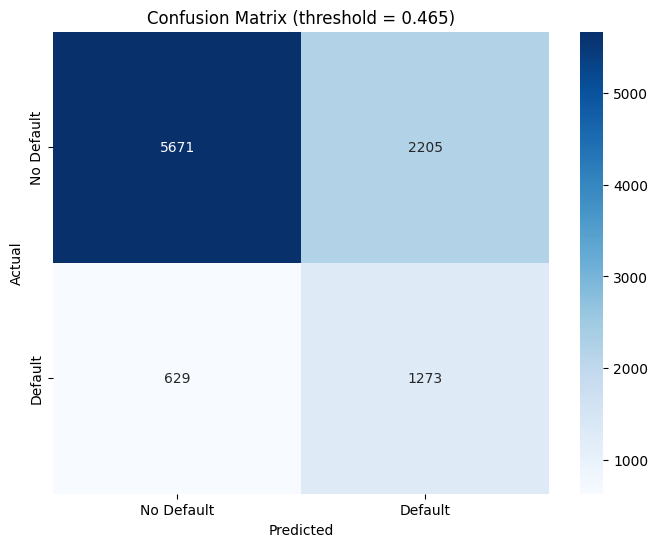

AUC-ROC : 0.7492920966356016
F2 Score: 0.5741475735161465


In [41]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=5, random_state=42)
lgbm_clf.fit(X_train, y_train)
y_proba = lgbm_clf.predict_proba(X_test)[:, 1]

y_pred = (y_proba > threshold).astype(int)

print(f"Using threshold = {threshold:.3f}")
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['No Default', 'Default'],
    yticklabels=['No Default', 'Default']
)
plt.title(f'Confusion Matrix (threshold = {threshold:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("AUC-ROC :", roc_auc_score(y_test, y_proba))
print("F2 Score:", fbeta_score(y_test, y_pred, beta=2))

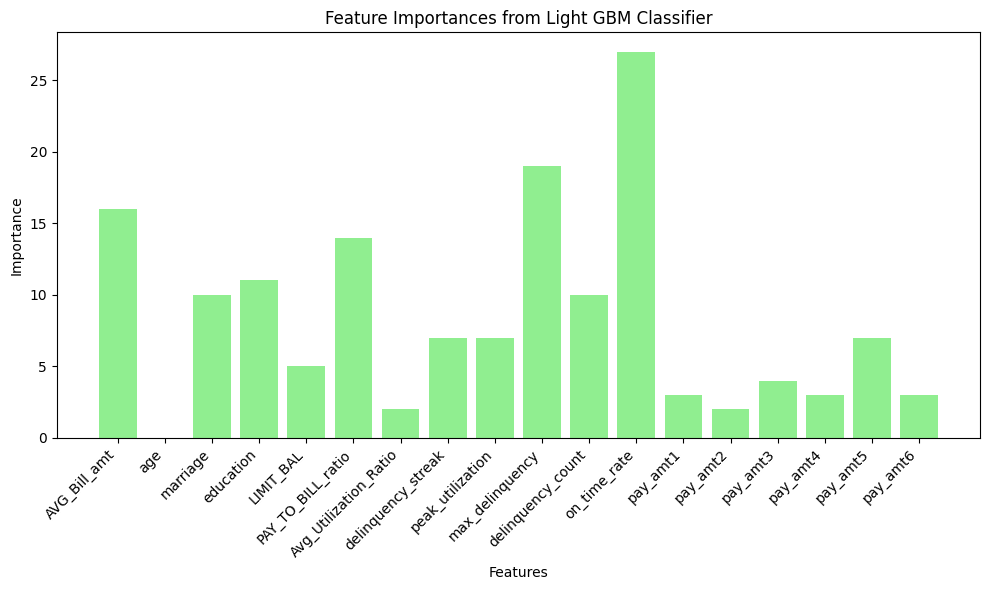

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, lgbm_clf.feature_importances_, color='lightgreen')
plt.title('Feature Importances from Light GBM Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.tight_layout()
plt.show()

In [43]:
# Step 1: Load the CSV file
data = pd.read_csv(r"C:\Users\shaur\Downloads\validate_dataset_final.csv")

In [44]:
new_data=data.drop('Customer_ID', axis=1)

In [45]:
new_data['sum_bill_amt'] = new_data[['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']].sum(axis=1)
bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]
# Calculate the average utilization ratio as per the formula: Avg Utilization Ratio = (sum of Bill_amt1 to Bill_amt6) / (6 * LIMIT_BAL)
new_data['Avg_Utilization_Ratio'] = new_data['sum_bill_amt'] / (6 * new_data['LIMIT_BAL'])

new_data['peak_utilization'] = new_data[bill_cols].max(axis=1)/new_data['LIMIT_BAL']
new_data.drop('sum_bill_amt', axis=1, inplace=True)

In [46]:
pay_cols = [f'pay_{i}' for i in (0,2,3,4,5,6)]
new_data['max_delinquency'] = new_data[pay_cols].max(axis=1)
new_data['delinquency_count'] = (new_data[pay_cols] >= 1).sum(axis=1)

In [47]:
new_data['on_time_rate'] = (new_data[pay_cols] == -1).sum(axis=1) / len(pay_cols)

In [48]:
def max_streak(arr):
        max_s, cur = 0, 0
        for v in arr:
            if v >= 1:
                cur += 1
                max_s = max(max_s, cur)
            else:
                cur = 0
        return max_s
new_data['delinquency_streak'] = new_data[pay_cols].apply(max_streak, axis=1)

In [49]:
new_data = new_data[['AVG_Bill_amt', 'age', 'marriage', 'education', 'LIMIT_BAL', 'PAY_TO_BILL_ratio', 'Avg_Utilization_Ratio', 'delinquency_streak', 'peak_utilization', 'max_delinquency', 'delinquency_count', 'on_time_rate', 'pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6']]

In [50]:
new_data.head()

,AVG_Bill_amt,age,marriage,education,LIMIT_BAL,PAY_TO_BILL_ratio,Avg_Utilization_Ratio,delinquency_streak,peak_utilization,max_delinquency,delinquency_count,on_time_rate,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,23456.33,32,1,2,220000,0.31,0.106620,0,0.132476,0,0,0.0,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71
1,13660.33,35,2,1,350000,1.00,0.039029,0,0.096338,0,0,0.5,33891.01,16267.19,4026.80,234.10,1565.11,26346.39
2,258034.17,39,2,1,310000,0.04,0.832369,0,0.969357,0,0,0.0,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21
3,13333.33,47,1,2,20000,0.08,0.666662,3,0.752008,2,3,0.0,1200.00,2799.83,0.14,1499.93,0.02,1000.26
4,77204.50,30,2,2,500000,0.23,0.154409,0,0.197236,0,0,0.0,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21


In [51]:
new_data.isnull().sum()

AVG_Bill_amt             0
age                      0
marriage                 0
education                0
LIMIT_BAL                0
PAY_TO_BILL_ratio        0
Avg_Utilization_Ratio    0
delinquency_streak       0
peak_utilization         0
max_delinquency          0
delinquency_count        0
on_time_rate             0
pay_amt1                 0
pay_amt2                 0
pay_amt3                 0
pay_amt4                 0
pay_amt5                 0
pay_amt6                 0
dtype: int64

In [52]:
y_proba = rf_clf.predict_proba(new_data)[:, 1]
prediction = (y_proba > threshold).astype(int)

# Save predictions to CSV
data['next_month_default(0 or 1)'] = prediction

In [53]:
data = data[['Customer_ID', 'next_month_default(0 or 1)']]

In [54]:
data.head()

,Customer_ID,next_month_default(0 or 1)
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0


In [55]:
data.to_csv("submission_23113139.csv", index=False)
print("Predictions saved to submission_23113139.csv")

Predictions saved to submission_23113139.csv


In [56]:
data['next_month_default(0 or 1)'].value_counts()

next_month_default(0 or 1)
0    3282
1    1734
Name: count, dtype: int64